Try to make a recommender system

https://towardsdatascience.com/intro-to-recommender-system-collaborative-filtering-64a238194a26 <br>
https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243

In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet') 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

stop_words = set(stopwords.words("english"))
new_words = ['go', 'nothing']
stop_words = stop_words.union(new_words, stop_words)

dataset = pd.read_csv('./Hotel_Reviews.csv')
summ = pd.read_csv('./per_review_summary.csv')
reviews = pd.read_csv('./hotel_review_summary.csv')

[nltk_data] Downloading package stopwords to /home/rudy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rudy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Ideally what we would do is take all of a users reviews, and find hotels that have summaries that are similar to the summaries of the users. However, we do not have reviews  grouped by user. Instead what we can do is pretend that a hotel is a person, and find the hotel that is most similar to that hotel (Which we treat as a proxy for the person's taste)

In [4]:
id = 8
hotel_id = summ['Hotel_Name'].unique()[id]
user = summ[summ['Hotel_Name'] == hotel_id][['Positive_Review_norm', 'Negative_Review_norm']]

In [5]:
user_sum = summ[summ['Hotel_Name'] == hotel_id][['Positive_summary']]
user_sum = [ii for ii in user_sum.dropna()['Positive_summary']]
user_sum = ', '.join(user_sum).replace(',','')
user_sum = [user_sum]


In [6]:
user_sum

['pleasant area bar nice room incredible made warmth treated really thunder storm insulated conveniently covent candle dream petal rose electric terrific bar cocktail real menu pleasing concerned genuinely switched wonderful commendation nephew army feed deserves throughout level comfort high service organising memorable personally one treat strand thames covent luxury equipped eneko dined hotel pricy doubt getaway perfect covent show stylish celebrating service smart sightseeing appreciated steam gorgeous sink welcoming super gluten group mumma daughter wardour advisory fresh attendant flower tray newspaper greeting fluffy well explained friendly great location staff stylish served despite dinner busy novalty martket outstanding cart surround benedict awesome egg pool amazing charlie celebratory factory beat thoroughly dream cooky box paper cake celebration regard champagne husband cake carering want come feel make upscale favorite lively uk delivered doorman champagne treat surprise 

In [7]:
count_user = CountVectorizer(stop_words = stop_words, max_features = 1000, ngram_range = (1,3))
count_matrix_user = count_user.fit_transform(user_sum)
max_words = count_matrix_user.shape[1]

count_all = CountVectorizer(max_df = 0.8, stop_words = stop_words, max_features = max_words, ngram_range = (1,3))
count_matrix_all = count_all.fit_transform(reviews['Positive_summary'])
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix_user, count_matrix_all)

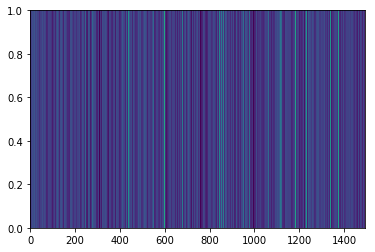

In [8]:
plt.pcolor(cosine_sim)

Now we see which hotel is recommended

In [9]:
print(summ['Hotel_Name'].unique()[np.argmax(cosine_sim)], np.max(cosine_sim))

Hotel Silver 0.34735440146038704


* For collaboritve filtering we need users and items. What if the **items are the keywords** that you have in your reviews, and the **users are the reviews themselves**, and the **reviews are linked to hotels**.
